# Exploratory Data Analysis

Notes à moi-même :
- Essayer de normaliser les données pour voir ce que ça donne
- Détecter les outliers et reprendre les études pour voir ce que ça donne (ex : "...more" pour les genres, les prix trop élevés, les livres avec très peu de notes, ...)
- Anova pour les prix
- Rating moyen des auteurs en fonction de leur nombre de livres parus (distributions)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wordcloud as wc

## Preprocessing

In [3]:
df = pd.read_csv("./../../data/goodreads_data.csv", converters={"genres": lambda x: x[1:-1].split(",")})
df["publication_date"] = pd.to_datetime(df["published"].apply(lambda x: " ".join(str(x).split()[:3])), errors="coerce")
df.head(5)

,title,author,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,...,literary_awards,original_title,series,characters,format,published,isbn,language,setting,publication_date
0,The Weed That Strings the Hangman's Bag,Alan Bradley,4.99,From Dagger Award-winning and internationally ...,Librarian Note: There is more than one author ...,"['Mystery', 'Fiction', 'Historical Fiction',...",55692.0,5756.0,"[395.0, 1540.0, 12237.0, 25714.0, 15806.0]","364 pages, Hardcover",...,['Goodreads Choice Award Nominee for Mystery &...,The Weed That Strings the Hangman's Bag,['Flavia de Luce '],"['Flavia de Luce', 'Ophelia de Luce', 'Daphne ...","364 pages, Hardcover","March 9, 2010 by Delacorte Press",9780385342315 (ISBN10: 0385342314),English,NaN,2010-03-09
1,A Good Man in Africa,William Boyd,11.99,"In the small African republic of Kinjanja, Bri...","Note: William^^BoydOf Scottish descent, Boyd w...","['Fiction', 'Africa', 'Humor', 'Novels', '...",5018.0,298.0,"[90.0, 257.0, 1222.0, 2184.0, 1265.0]","352 pages, Paperback",...,"['Whitbread Award for First Novel (1981)', 'So...",A Good Man in Africa,NaN,['Morgan Leafy'],"352 pages, Paperback","January 14, 2003 by Vintage",9781400030026 (ISBN10: 1400030021),English,['Kinjanja'],2003-01-14
2,It Had to Be You,Janice Thompson,0.00,Bella couldn't be happier that her long-feudin...,"Welcome to the wacky, wonderful world of inspi...","['Christian Fiction', 'Romance', 'Christian'...",2152.0,132.0,"[14.0, 86.0, 421.0, 735.0, 896.0]","336 pages, Paperback",...,NaN,NaN,"['Weddings by Bella', 'Galveston Weddings']",NaN,"336 pages, Paperback","May 1, 2010 by Revell",9780800733445 (ISBN10: 0800733444),English,"['Galveston, Texas']",2010-05-01
3,Missing,Kelley Armstrong,6.99,Everyone knows they left. No one knows they're...,Kelley Armstrong has been telling stories sinc...,"['Young Adult', 'Mystery', 'Thriller', 'Fic...",3393.0,491.0,"[54.0, 185.0, 799.0, 1308.0, 1047.0]","515 pages, ebook",...,NaN,Reeve's End (working title only),NaN,"['Edie Greene', 'Winter Crane', 'Tanner Robson...","515 pages, ebook","April 18, 2017 by Crown Books for Young Readers",9780399550348 (ISBN10: 0399550348),English,NaN,2017-04-18
4,Dawn of Rebellion,Michelle Lynn,0.00,"My name is Dawn Nolan, and I've grown up on th...",Michelle moved around the Midwest most of her ...,"['Young Adult', 'Dystopia', 'Romance', 'Sci...",142.0,76.0,"[1.0, 6.0, 23.0, 41.0, 71.0]","321 pages, Paperback",...,NaN,Dawn of Rebellion,['Dawn of Rebellion'],NaN,"321 pages, Paperback","October 17, 2013 by CreateSpace Independent Pu...",9781492942429 (ISBN10: 1492942421),English,NaN,2013-10-17


In [4]:
print("Number of books (with duplicates) : ", len(df))
df.drop_duplicates(subset=["title", "author"], keep='first', inplace=True, ignore_index=True)
print("Number of books (without duplicates) : ", len(df))

Number of books (with duplicates) :  24630
Number of books (without duplicates) :  19666


## Authors Analysis

In [5]:
authors_groups = df.groupby("author")

In [6]:
authors_number_of_books = authors_groups.count().sort_values(by="title", ascending=False)
authors_number_of_books.head(5)

,title,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,publication_info,literary_awards,original_title,series,characters,format,published,isbn,language,setting,publication_date
author,,,,,,,,,,,,,,,,,,,,
Neil Gaiman,48,48,48,0,48,48,48,48,48,48,23,39,27,30,48,48,38,48,12,48
Stephen King,36,36,36,36,36,36,36,36,36,36,24,36,6,25,36,36,25,36,23,36
R.L. Stine,34,34,34,34,34,34,34,34,34,34,0,33,34,23,34,34,34,34,3,34
Nora Roberts,32,32,32,32,32,32,32,32,32,32,13,32,25,31,32,32,28,32,31,32
J.D. Robb,26,26,26,26,26,26,26,26,26,26,13,25,26,25,26,26,25,25,17,26


In [8]:
authors_number_of_books.describe()

,title,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,publication_info,literary_awards,original_title,series,characters,format,published,isbn,language,setting,publication_date
count,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000
mean,1.630545,1.630545,1.630379,1.445237,1.630545,1.630545,1.630545,1.630545,1.630545,1.630545,0.447475,1.292264,0.877788,0.519443,1.630545,1.622751,1.352541,1.600945,0.477987,1.618937
std,1.792645,1.792645,1.792610,1.827627,1.792645,1.792645,1.792645,1.792645,1.792645,1.792645,0.921908,1.727947,1.686348,1.428584,1.792645,1.791252,1.644454,1.786451,1.180459,1.790444
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000
max,48.000000,48.000000,48.000000,36.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,24.000000,39.000000,34.000000,31.000000,48.000000,48.000000,38.000000,48.000000,31.000000,48.000000


<Axes: xlabel='title', ylabel='Count'>

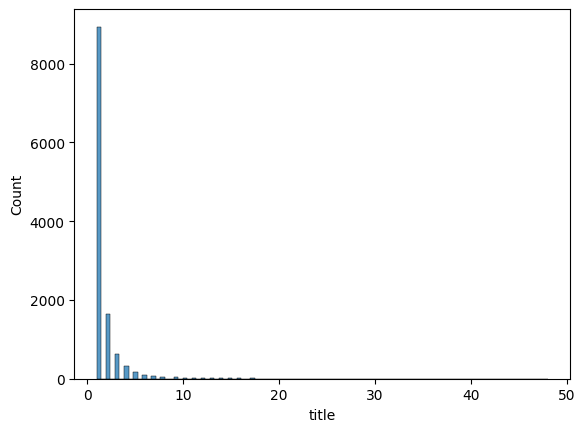

In [9]:
# Number of authors having published x books among those in our dataset
sns.histplot(authors_number_of_books, x="title", bins=100)

Dans notre dataset, la plupart des auteurs n'ont écrit qu'un seul livre, l'auteur le plus prolifique ayant publié près de 48 livres (probablement un outlier, car on peut s'attendre à ce que 75% de la population ait écrit moins de deux livres). Par ailleurs, cela impacte également la moyenne : on s'attend à ce qu'un auteur ait écrit entre un et deux livres.

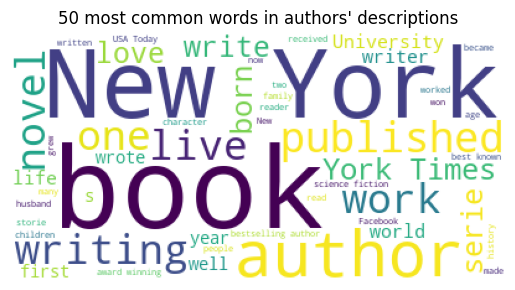

In [10]:
authors_descriptions = " ".join(df["author_description"].dropna())
wordcloud = wc.WordCloud(background_color="white", max_words=50).generate(authors_descriptions)
plt.imshow(wordcloud)
plt.title("50 most common words in authors' descriptions")
plt.axis("off")
plt.show()

In [13]:
# Corrélation n_books et ratings
# n_books selon les années